In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec

In [2]:
df = pd.read_csv("hardware-resources.csv")
colors = ['r', 'g', 'b', 'm']
print(df)

      implementation  input-size  cells  io-ports  nets   lut   ff  \
0     Selection sort           4     10        15    51    18   25   
1     Selection sort           8     10        27    87    37   45   
2     Selection sort          16     10        51   159    72   85   
3   Linear cell sort           4      9        12    46    41   27   
4   Linear cell sort           8     13        20   112   119   81   
5   Linear cell sort          16     21        36   338   404  283   
6    Odd-even sort N           4     25        37   120    86   17   
7    Odd-even sort N           8     81       133   712   860   65   
8    Odd-even sort N          16    289       517  4872  6744  258   
9    Odd-even sort 3           4     24        37   104    78   17   
10   Odd-even sort 3           8     76       133   392   431   65   
11   Odd-even sort 3          16    276       517  1544  1583  257   

    device-static  device-dynamic  
0               8              92  
1              15

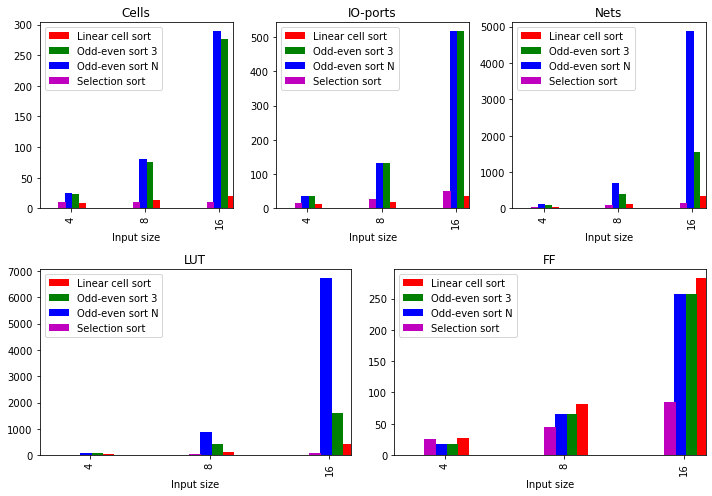

In [35]:
fig = plt.figure(figsize=(10, 7))
gs = GridSpec(2, 6, figure=fig)

axs = [fig.add_subplot(gs[0,0:2]),
       fig.add_subplot(gs[0,2:4]),
       fig.add_subplot(gs[0,4:]),
       fig.add_subplot(gs[1,0:3]),
       fig.add_subplot(gs[1,3:])
      ]

columns = ['cells', 'io-ports', 'nets', 'lut', 'ff']
column_titles = ['Cells', 'IO-ports', 'Nets', 'LUT', 'FF']

for column, title, ax in zip(columns, column_titles, axs):
    for (name, group), color, offset in zip(df.groupby("implementation"), colors, np.linspace(-1, 1.7, 4)):
        group.plot.bar(
            x="input-size",
            y=column,
            ax=ax,
            label=name,
            color=color,
            position=offset,
            width=0.1,
            title=title,
            xlabel="Input size"
        )

plt.tight_layout()

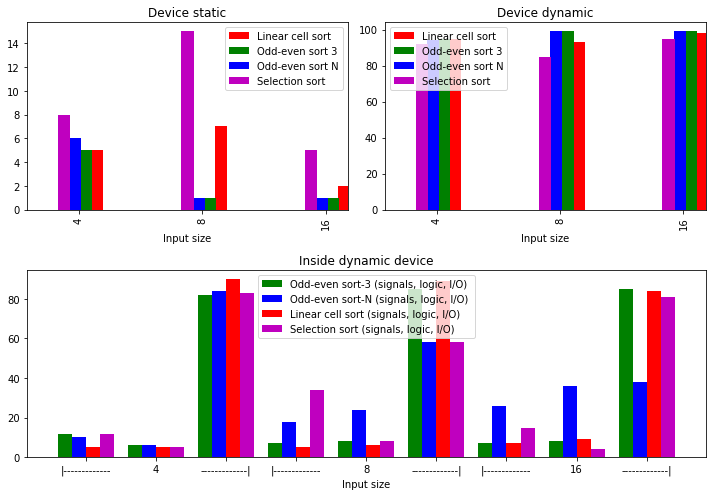

In [48]:
fig = plt.figure(figsize=(10, 7))
gs = GridSpec(2, 2, figure=fig)

axs = [fig.add_subplot(gs[0,0]), fig.add_subplot(gs[0,1])]

columns = ['device-static', 'device-dynamic']
column_titles = ['Device static', 'Device dynamic']

for column, title, ax in zip(columns, column_titles, axs):
    for (name, group), color, offset in zip(df.groupby("implementation"), colors, np.linspace(-1, 1.7, 4)):
        group.plot.bar(
            x="input-size",
            y=column,
            ax=ax,
            label=name,
            color=color,
            position=offset,
            width=0.1,
            title=title,
            xlabel="Input size"
        )

indx = 9
labels= 3
width = 0.2
index = np.arange(indx) 

odd_3_Dd = [12, 6, 82     ,7, 8, 85,   7, 8, 85]  # inside dynamic
          # 4   8    16
odd_N_Dd = [10, 6, 84,    18, 24, 58    , 26, 36, 38]  # inside dynamic
          # 4   8    16
linear_Dd = [5, 5, 90     , 5, 6, 89      ,7,9,84]  # inside dynamic
          # 4   8    16
selection_Dd = [12, 5, 83   , 34, 8, 58  , 15, 4, 81]

ax = fig.add_subplot(gs[1,:])
ax.bar(index, odd_3_Dd, width, color='g', label='Odd-even sort-3 (signals, logic, I/O) ')
ax.bar(index + width, odd_N_Dd, width, color='b',label='Odd-even sort-N (signals, logic, I/O) ')
ax.bar(index + 2*width, linear_Dd, width, color='r',label='Linear cell sort (signals, logic, I/O) ')
ax.bar(index + 3*width, selection_Dd, width, color='m',label='Selection sort (signals, logic, I/O) ')
ax.set_xticks(index + width * 1.5)
ax.set_xticklabels(('|-------------', '4', '-------------|', '|-------------', '8', '-------------|','|-------------', '16', '-------------|'))
ax.legend(loc='best')
ax.set_title('Inside dynamic device')
ax.set_xlabel('Input size')

plt.tight_layout()

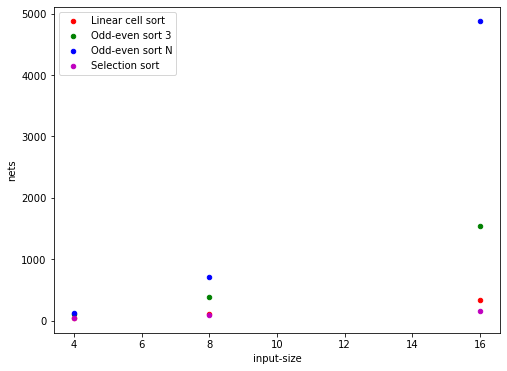

In [4]:
fig, ax = plt.subplots(figsize=(8,6))

for (name, group), color in zip(df.groupby("implementation"), colors):
    group.plot.scatter(x="input-size",y="nets",ax=ax,label=name,color=color)

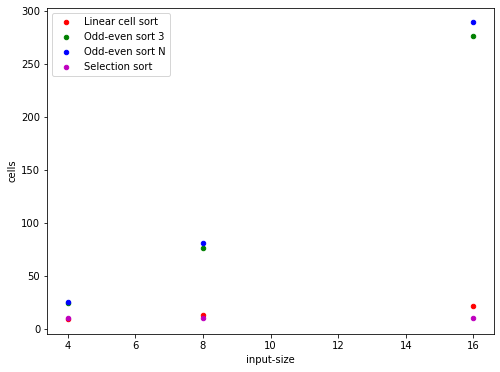

In [5]:
fig, ax = plt.subplots(figsize=(8,6))

for (name, group), color in zip(df.groupby("implementation"), colors):
    group.plot.scatter(x="input-size",y="cells",ax=ax,label=name,color=color)

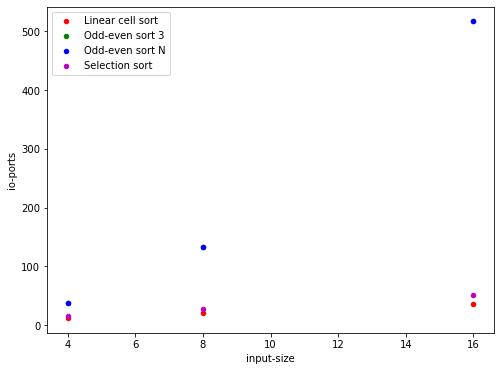

In [6]:
fig, ax = plt.subplots(figsize=(8,6))

for (name, group), color in zip(df.groupby("implementation"), colors):
    group.plot.scatter(x="input-size",y="io-ports",ax=ax,label=name,color=color)